## 1. Import thư viện

In [37]:
import numpy as np
import struct
from array import array
from os.path import join
import gzip
import random
import matplotlib.pyplot as plt
from os.path import join
import cv2

## 2. Định nghĩa lớp `MnistDataloader`
Đọc ảnh & nhãn từ các file MNIST định dạng IDX nén `.gz`.

In [38]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels_zip(self, images_filepath, labels_filepath):        
        # Đọc labels
        with gzip.open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(
                    f'Magic number mismatch for labels, expected 2049, got {magic}'
                )
            labels = array("B", file.read())        
        
        # Đọc images
        with gzip.open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(
                    f'Magic number mismatch for images, expected 2051, got {magic}'
                )
            image_data = array("B", file.read())
        
        # Chuyển toàn bộ ảnh thành numpy array shape (size, rows, cols)
        images = np.array(image_data, dtype=np.uint8).reshape(size, rows, cols)
        
        return images, np.array(labels, dtype=np.uint8)
        
    def load_data_zip(self):
        x_train, y_train = self.read_images_labels_zip(
            self.training_images_filepath, self.training_labels_filepath
        )
        x_test, y_test = self.read_images_labels_zip(
            self.test_images_filepath, self.test_labels_filepath
        )
        return (x_train, y_train), (x_test, y_test)
    def read_img_labels(self, images_filepath, labels_filepath):        
        # Đọc labels
        
        with open(images_filepath, 'rb') as f:
            magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
            data = np.frombuffer(f.read(), dtype=np.uint8)
            images = data.reshape(num, rows, cols)
            


        with open(labels_filepath, 'rb') as f:
            magic, num = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.uint8)
            labels = data
        
        return images.astype(np.float64), np.array(labels, dtype=np.uint8)
    def load_data(self):
        x_train, y_train = self.read_img_labels(
            self.training_images_filepath, self.training_labels_filepath
        )
        x_test, y_test = self.read_img_labels(
            self.test_images_filepath, self.test_labels_filepath
        )
        return (x_train, y_train), (x_test, y_test)

## 3. Khai báo đường dẫn tới các file MNIST


In [39]:
input_path = 'data'

training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath     = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath     = join(input_path, 't10k-labels.idx1-ubyte')

## 4. Hàm hiển thị một danh sách ảnh kèm tiêu đề

In [40]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images) / cols) + 1
    plt.figure(figsize=(15, 6))
    index = 1    
    for img, title_text in zip(images, title_texts):        
        plt.subplot(rows, cols, index)        
        plt.imshow(img, cmap=plt.cm.gray)
        if title_text != '':
            plt.title(title_text, fontsize=10)
        plt.axis('off')
        index += 1
    plt.show()

## 5. Load dữ liệu MNIST bằng `MnistDataloader`

In [41]:
mnist_dataloader = MnistDataloader(
    training_images_filepath, training_labels_filepath,
    test_images_filepath, test_labels_filepath
)

(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

print("X_train:", x_train.shape, "y_train:", y_train.shape)
print("X_test :", x_test.shape,  "y_test :", y_test.shape)
print("Kiểu x_train:", type(x_train), " | Kiểu y_train:", type(y_train))

X_train: (60000, 28, 28) y_train: (60000,)
X_test : (10000, 28, 28) y_test : (10000,)
Kiểu x_train: <class 'numpy.ndarray'>  | Kiểu y_train: <class 'numpy.ndarray'>


## 6. EDA – Khám phá dữ liệu cơ bản

In [42]:
print("===== Thông tin cơ bản =====")
print("Số mẫu train:", x_train.shape[0])
print("Số mẫu test :", x_test.shape[0])
print("Kích thước mỗi ảnh:", x_train.shape[1:], "(rows, cols)")
print("Kiểu dữ liệu ảnh:", x_train.dtype)
print("Giá trị pixel min/max (train):", x_train.min(), x_train.max())
print("Giá trị pixel min/max (test) :", x_test.min(),  x_test.max())

print("\n===== Nhãn (labels) =====")
print("Các nhãn train duy nhất:", np.unique(y_train))
print("Các nhãn test  duy nhất:", np.unique(y_test))

print("\nSố lượng mỗi lớp trong tập train:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Số {u}: {c} mẫu")

print("\nSố lượng mỗi lớp trong tập test:")
unique_t, counts_t = np.unique(y_test, return_counts=True)
for u, c in zip(unique_t, counts_t):
    print(f"  Số {u}: {c} mẫu")


===== Thông tin cơ bản =====
Số mẫu train: 60000
Số mẫu test : 10000
Kích thước mỗi ảnh: (28, 28) (rows, cols)
Kiểu dữ liệu ảnh: float64
Giá trị pixel min/max (train): 0.0 255.0
Giá trị pixel min/max (test) : 0.0 255.0

===== Nhãn (labels) =====
Các nhãn train duy nhất: [0 1 2 3 4 5 6 7 8 9]
Các nhãn test  duy nhất: [0 1 2 3 4 5 6 7 8 9]

Số lượng mỗi lớp trong tập train:
  Số 0: 5923 mẫu
  Số 1: 6742 mẫu
  Số 2: 5958 mẫu
  Số 3: 6131 mẫu
  Số 4: 5842 mẫu
  Số 5: 5421 mẫu
  Số 6: 5918 mẫu
  Số 7: 6265 mẫu
  Số 8: 5851 mẫu
  Số 9: 5949 mẫu

Số lượng mỗi lớp trong tập test:
  Số 0: 980 mẫu
  Số 1: 1135 mẫu
  Số 2: 1032 mẫu
  Số 3: 1010 mẫu
  Số 4: 982 mẫu
  Số 5: 892 mẫu
  Số 6: 958 mẫu
  Số 7: 1028 mẫu
  Số 8: 974 mẫu
  Số 9: 1009 mẫu


### 6.1. Phân bố nhãn (label distribution)

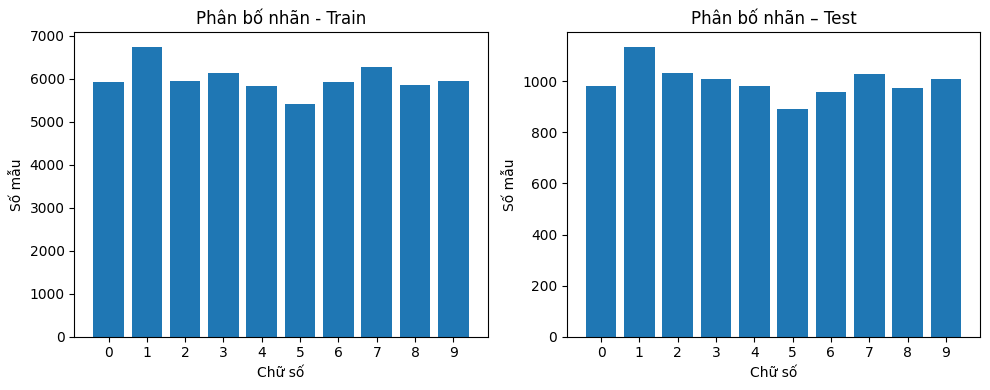

In [43]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10))
plt.title("Phân bố nhãn - Train")
plt.xlabel("Chữ số")
plt.ylabel("Số mẫu")

plt.subplot(1,2,2)
plt.hist(y_test, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10))
plt.title("Phân bố nhãn – Test")
plt.xlabel("Chữ số")
plt.ylabel("Số mẫu")

plt.tight_layout()
plt.show()

### 6.2 Kiểm tra và xử lý giá trị thiếu (NaN / Inf)

In [44]:
def check_missing(X, y, name=""):
    print(f"=== Kiểm tra thiếu cho {name} ===")
    X_nan  = np.isnan(X).sum()
    y_nan  = np.isnan(y).sum()
    X_inf  = np.isinf(X).sum()
    y_inf  = np.isinf(y).sum()
    print("Số NaN  trong ảnh :", X_nan)
    print("Số NaN  trong nhãn:", y_nan)
    print("Số Inf  trong ảnh :", X_inf)
    print("Số Inf  trong nhãn:", y_inf)
    print()

check_missing(x_train, y_train, "Train")
check_missing(x_test, y_test, "Test")

=== Kiểm tra thiếu cho Train ===
Số NaN  trong ảnh : 0
Số NaN  trong nhãn: 0
Số Inf  trong ảnh : 0
Số Inf  trong nhãn: 0

=== Kiểm tra thiếu cho Test ===
Số NaN  trong ảnh : 0
Số NaN  trong nhãn: 0
Số Inf  trong ảnh : 0
Số Inf  trong nhãn: 0



### 6.3 Hiển thị một vài ảnh train & test ngẫu nhiên

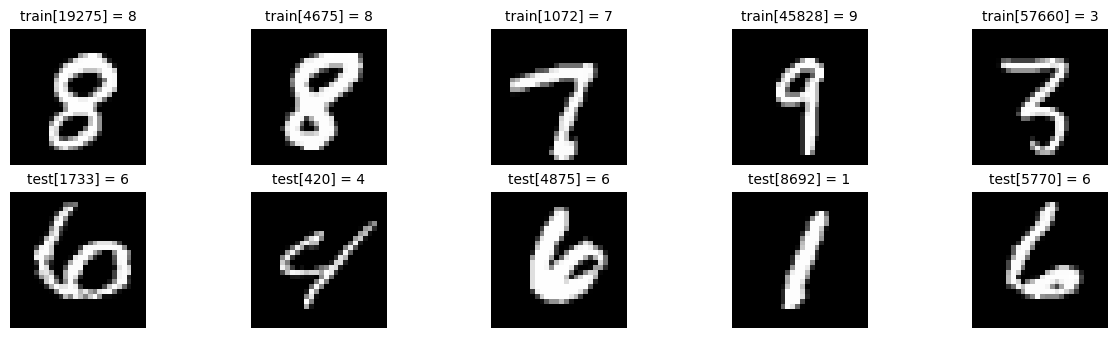

In [45]:
images_2_show = []
titles_2_show = []

# 10 ảnh train ngẫu nhiên
for _ in range(5):
    r = random.randint(0, x_train.shape[0] - 1)
    images_2_show.append(x_train[r])
    titles_2_show.append(f'train[{r}] = {y_train[r]}')

# 5 ảnh test ngẫu nhiên
for _ in range(5):
    r = random.randint(0, x_test.shape[0] - 1)
    images_2_show.append(x_test[r])
    titles_2_show.append(f'test[{r}] = {y_test[r]}')

show_images(images_2_show, titles_2_show)

## 7. Cài đặt lớp SoftmaxRegression (NumPy thuần)


In [46]:
np.random.seed(42)  # để kết quả có thể lặp lại

class SoftmaxRegression:
    def __init__(self, input_dim, num_classes, learning_rate=0.1):
        """
        input_dim   : số chiều của vector đặc trưng (ví dụ: 784)
        num_classes : số lớp (MNIST = 10)
        learning_rate : tốc độ học (eta) cho gradient descent
        """
        self.input_dim = input_dim
        self.n_classes = num_classes
        self.lr = learning_rate
        
        # Khởi tạo trọng số W và bias b nhỏ ngẫu nhiên
        # W: (input_dim, num_classes), b: (num_classes,)
        self.W = 0.01 * np.random.randn(input_dim, num_classes).astype(np.float32)
        self.b = np.zeros(num_classes, dtype=np.float32)
    
    def _softmax(self, logits):
        """
        logits: mảng (N, num_classes)
        Trả về: xác suất (N, num_classes)
        Dùng trick trừ max theo hàng để tránh tràn số.
        """
        # Trừ max mỗi hàng cho ổn định số
        logits_stable = logits - np.max(logits, axis=1, keepdims=True)
        exp_logits = np.exp(logits_stable)
        probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return probs
    
    def _compute_loss_and_gradients(self, X, y):
        """
        X: (N, D)
        y: (N,) chứa nhãn đúng (0..num_classes-1)
        
        Trả về:
            - loss (scalar)
            - grad_W: gradient theo W, shape (D, C)
            - grad_b: gradient theo b, shape (C,)
        """
        N, D = X.shape
        
        # (1) Tính logits = XW + b
        logits = X @ self.W + self.b  # shape (N, C)
        
        # (2) Softmax để ra xác suất
        probs = self._softmax(logits)  # (N, C)
        
        # (3) Cross-entropy loss (trung bình trên N mẫu)
        # L = -1/N * sum log( p_correct_class )
        correct_logprobs = -np.log(probs[np.arange(N), y] + 1e-15)
        loss = np.mean(correct_logprobs)
        
        # (4) Gradient
        # Công thức chuẩn: dL/dz = p - y_one_hot
        dlogits = probs.copy()                 # (N, C)
        dlogits[np.arange(N), y] -= 1.0        # p - 1 tại vị trí đúng
        dlogits /= N                           # chia N để gradient là trung bình
        
        # dW = X^T * dlogits
        grad_W = X.T @ dlogits                # (D, C)
        # db = sum theo N
        grad_b = np.sum(dlogits, axis=0)      # (C,)
        
        return loss, grad_W, grad_b
    
    def predict_proba(self, X):
        """
        Trả về xác suất dự đoán cho từng lớp, shape (N, num_classes)
        """
        logits = X @ self.W + self.b
        probs = self._softmax(logits)
        return probs
    
    def predict(self, X):
        """
        Trả về nhãn dự đoán (argmax) cho mỗi mẫu, shape (N,)
        """
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)
    
    def fit(self, X, y, num_epochs=50, verbose=True):
        """
        Huấn luyện mô hình bằng full-batch gradient descent.
        
        X: (N, D)  - feature vector
        y: (N,)    - nhãn
        """
        history = {"loss": [], "accuracy": []}
        
        for epoch in range(num_epochs):
            # Tính loss và gradient trên toàn bộ tập train
            loss, grad_W, grad_b = self._compute_loss_and_gradients(X, y)
            
            # Cập nhật tham số theo gradient descent
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b
            
            # Tính accuracy trên tập train để theo dõi
            y_pred = self.predict(X)
            acc = (y_pred == y).mean()
            
            history["loss"].append(loss)
            history["accuracy"].append(acc)
            
            
        
        return history

## 8. Trích xuất vector đặc trưng

### 8.1 Feature 1:Chuẩn hóa dữ liệu và flatten ảnh 

In [47]:
# Chuyển sang float64 và chuẩn hóa về [0, 1]
X_train = x_train.astype(np.float64) / 255.0
X_test  = x_test.astype(np.float64) / 255.0

# Flatten từ (N, 28, 28) -> (N, 784)
N_train = X_train.shape[0]
N_test  = X_test.shape[0]

X_train_flat = X_train.reshape(N_train, -1)  # (60000, 784)
X_test_flat  = X_test.reshape(N_test, -1)    # (10000, 784)

print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat  shape:", X_test_flat.shape)
print("Kiểu dữ liệu:", X_train_flat.dtype)

X_train_flat shape: (60000, 784)
X_test_flat  shape: (10000, 784)
Kiểu dữ liệu: float64


### 8.2 Feature 2: 

In [48]:
def extract_edge_features(images):
    """
    Applies Sobel to extract edge feature from (N, 28, 28) images.
    Returns flattened feature vectors (N, 784).
    """
    features = []

    for img in images:
        img_float = img.astype(np.float64)

        sobelx = cv2.Sobel(img_float, cv2.CV_64F, 1, 0, ksize=3) # đạo hàm theo trục x
        sobely = cv2.Sobel(img_float, cv2.CV_64F, 0, 1, ksize=3) # đạo hàm theo trục y

        magnitude = np.sqrt(sobelx**2 + sobely**2)

        max_val = np.max(magnitude)
        if max_val > 0:
            magnitude = magnitude / max_val

        features.append(magnitude.flatten())

    return np.array(features)

# Feature set 2: biên Sobel (dùng OpenCV hoặc NumPy)
X_train_edges = extract_edge_features(X_train)      # hoặc extract_edge_features_numpy(x_train)
X_test_edges  = extract_edge_features(X_test)

print(X_train_edges.shape)  # (60000, 784)
print(X_test_edges.shape)   # (10000, 784)
print("Kiểu dữ liệu:", X_train_edges.dtype)
# Huấn luyện một mô hình Softmax mới cho feature set 2
model_edges = SoftmaxRegression(
    input_dim=X_train_edges.shape[1],  # 784
    num_classes=10,
    learning_rate=0.1
)

history_edges = model_edges.fit(X_train_edges, y_train, num_epochs=50, verbose=True)

# Đánh giá
y_test_pred_edges = model_edges.predict(X_test_edges)
test_acc_edges = (y_test_pred_edges == y_test).mean()
print("Test accuracy (edge features):", test_acc_edges)

(60000, 784)
(10000, 784)
Kiểu dữ liệu: float64
Test accuracy (edge features): 0.8044


### 8.3 Feature 3: PCA

In [49]:
import PCA.PCA as pca_module
pca = pca_module.PCA(n_components=100)
X_train_pca = pca.fit_transform(x_train.reshape(N_train, -1))
X_test_pca  = pca.transform(x_test.reshape(N_test, -1))
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca  shape:", X_test_pca.shape)
print("Kiểu dữ liệu:", X_train_pca.dtype)

X_train_pca shape: (60000, 100)
X_test_pca  shape: (10000, 100)
Kiểu dữ liệu: float64


## 9. Huấn luyện mô hình Softmax Regression

### 9.1 Huấn luyện feature 1

In [50]:
input_dim = X_train_flat.shape[1]  # 784
num_classes = 10

model_raw = SoftmaxRegression(
    input_dim=input_dim,
    num_classes=num_classes,
    learning_rate=0.12
)

history = model_raw.fit(
    X_train_flat,
    y_train,
    num_epochs=150,
    verbose=True
)

### 9.2 Huấn luyện feature 2

In [51]:
model_edges = SoftmaxRegression(
    input_dim=X_train_edges.shape[1],
    num_classes=num_classes,
    learning_rate=0.12
)

history_edges = model_edges.fit(
    X_train_edges, 
    y_train, 
    num_epochs=150, 
    verbose=True
)

### 9.3 Huấn luyện feature 3: PCA

In [52]:
model_pca = SoftmaxRegression(
    input_dim=X_train_pca.shape[1],
    num_classes=num_classes,
    learning_rate=0.12
)

history = model_pca.fit(
    X_train_pca,
    y_train,
    num_epochs=150,
    verbose=True
)

## 10. Đánh giá mô hình


Feature 1 (Raw Pixel):
Accuracy: 0.8838
Precision (macro): 0.8828
Recall (macro): 0.8820
F1-score (macro): 0.8817


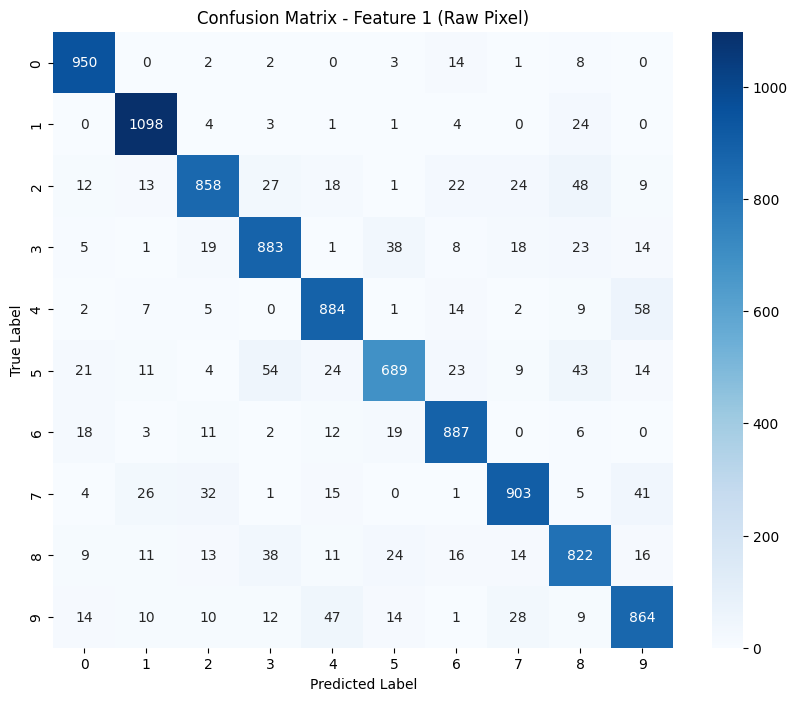


Feature 2 (Edges):
Accuracy: 0.8467
Precision (macro): 0.8470
Recall (macro): 0.8442
F1-score (macro): 0.8442


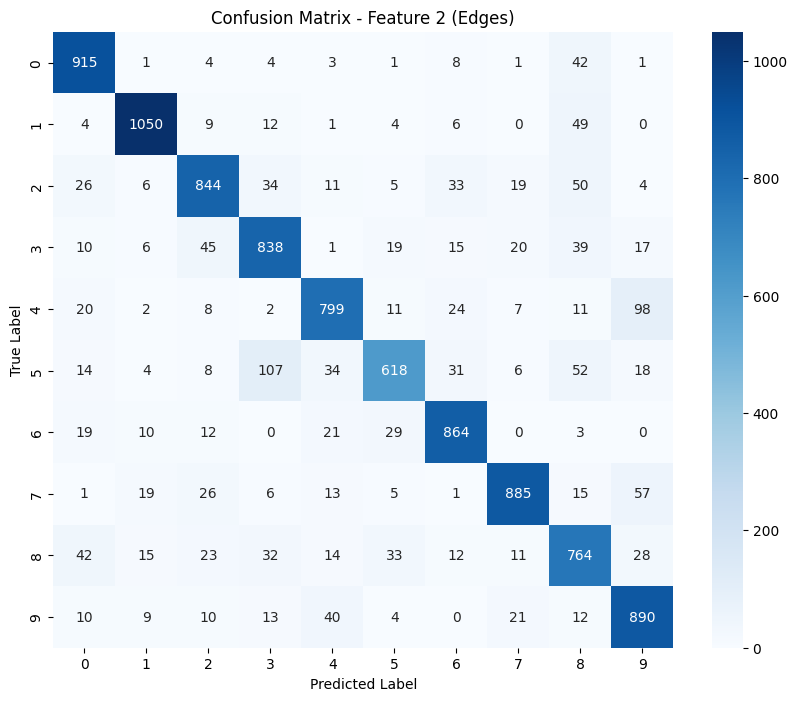


Feature 3 (PCA):
Accuracy: 0.6404
Precision (macro): 0.7157
Recall (macro): 0.6426
F1-score (macro): 0.6484


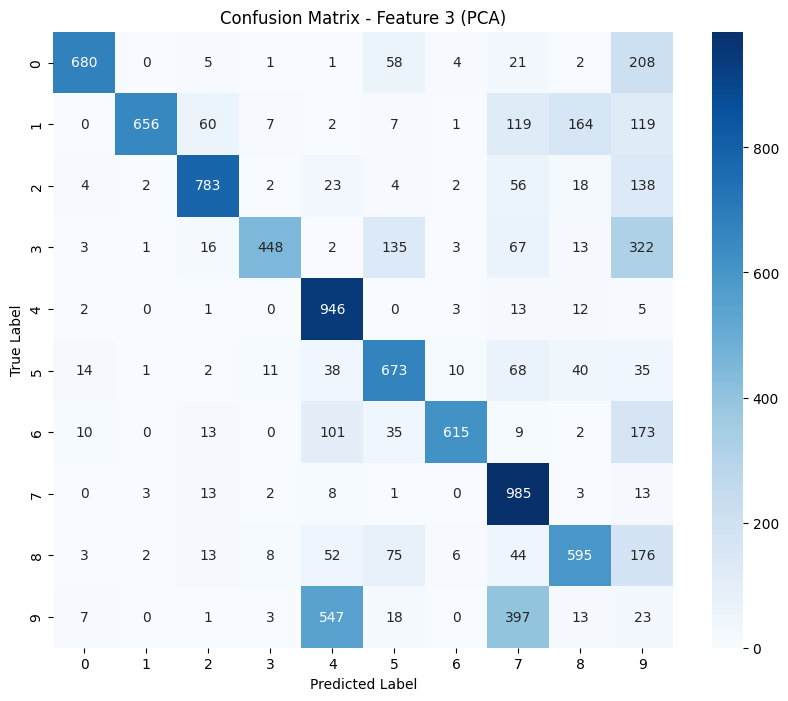

In [53]:
import Evaluation as evaluation


# Đánh giá mô hình trên tập kiểm tra cho feature 1 (raw pixel)
eval_raw = evaluation.Evaluation(model_raw, X_test_flat, y_test)
acc_raw, precision_raw, recall_raw, f1_raw, cm_raw = eval_raw.evaluate_model_multiclass()

print("Feature 1 (Raw Pixel):")
print(f"Accuracy: {acc_raw:.4f}")
print(f"Precision (macro): {precision_raw:.4f}")
print(f"Recall (macro): {recall_raw:.4f}")
print(f"F1-score (macro): {f1_raw:.4f}")
eval_raw.visualize_confusion_matrix(cm=cm_raw, title="Confusion Matrix - Feature 1 (Raw Pixel)")

# Đánh giá mô hình trên tập kiểm tra cho feature 2 (edges)
eval_edges = evaluation.Evaluation(model_edges, X_test_edges, y_test)
acc_edges, precision_edges, recall_score_edges, f1_edges, cm_edges = eval_edges.evaluate_model_multiclass()

print("\nFeature 2 (Edges):")
print(f"Accuracy: {acc_edges:.4f}")
print(f"Precision (macro): {precision_edges:.4f}")
print(f"Recall (macro): {recall_score_edges:.4f}")
print(f"F1-score (macro): {f1_edges:.4f}")

eval_edges.visualize_confusion_matrix(cm=cm_edges, title="Confusion Matrix - Feature 2 (Edges)")

# Đánh giá mô hình trên tập kiểm tra cho feature 3 (PCA)
eval_pca = evaluation.Evaluation(model_pca, X_test_pca, y_test)
acc_pca, precision_pca, recall_score_pca, f1_pca, cm_pca = eval_pca.evaluate_model_multiclass()

print("\nFeature 3 (PCA):")
print(f"Accuracy: {acc_pca:.4f}")
print(f"Precision (macro): {precision_pca:.4f}")
print(f"Recall (macro): {recall_score_pca:.4f}")
print(f"F1-score (macro): {f1_pca:.4f}")
eval_pca.visualize_confusion_matrix(cm=cm_pca, title="Confusion Matrix - Feature 3 (PCA)")

# 11. Save model

In [54]:
# feature 1: raw pixel
with open('para_model/model_raw.npz', 'wb') as f:
    np.savez(f, W=model_raw.W, b=model_raw.b)
    print("Lưu mô hình raw pixel thành công.")
# feature 2: edges
with open('para_model/model_edges.npz', 'wb') as f:
    np.savez(f, W=model_edges.W, b=model_edges.b)
    print("Lưu mô hình edges thành công.")
# feature 3: PCA
with open('para_model/model_pca.npz', 'wb') as f:
    np.savez(f, W=model_pca.W, b=model_pca.b, mu=pca.mu, U_m=pca.U_m, components=pca.n_components)
    print("Lưu mô hình PCA thành công.")


Lưu mô hình raw pixel thành công.
Lưu mô hình edges thành công.
Lưu mô hình PCA thành công.
